The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
all params       [-1.15696024  1.11740881 -0.66034828 -1.20318969  1.38239537]
a_m_zeros params [ 0.          0.05315493 -0.1764308   0.          0.03780172]


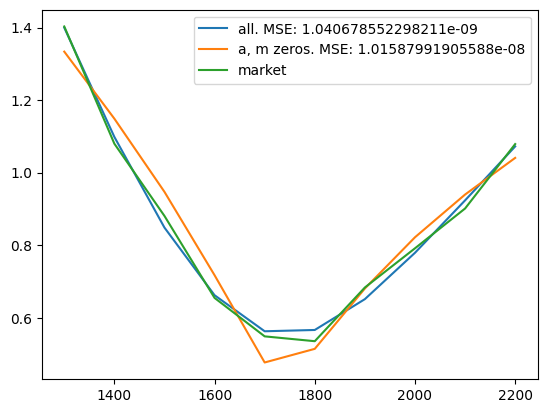

In [3]:
%load_ext autoreload
%autoreload 2

import numpy as np
import matplotlib.pyplot as plt
from pyquant.svi import SVICalc
from pyquant.black_scholes import *
from pyquant.vol_surface import VolSmileChainSpace

bs_calc = BSCalc()

strikes = np.array([1300., 1400, 1500, 1600, 1700, 1800., 1900, 2000, 2100, 2200])
tau = 0.01
F = 1723.75
forward = Forward(Spot(F), ForwardYield(0.01), DiscountYield(0.01), TimeToMaturity(tau))
pvs = np.array([ 1.72375, 1.72375, 3.4475, 6.895, 26.718125, 11.204375,
                4.309375, 1.72375, 0.861875, 0.861875])

implied_vols = bs_calc.implied_vols(
    forward, 
    Strikes(strikes),
    Premiums(pvs)
).data


vol_smile_chain = VolSmileChainSpace(
    forward,
    Strikes(strikes),
    ImpliedVols(implied_vols)
)

weights = CalibrationWeights(np.ones_like(vol_smile_chain.Ks))

svi = SVICalc()
raw_params_all, error_all =             svi.calibrate(vol_smile_chain, weights, False, False, False)
raw_params_a_m_zeros, error_a_m_zeros = svi.calibrate(vol_smile_chain, weights, False, False, True)

all_implied_vols =       svi.implied_vols(forward, Strikes(strikes), raw_params_all)
a_m_zeros_implied_vols = svi.implied_vols(forward, Strikes(strikes), raw_params_a_m_zeros)

plt.plot(strikes, all_implied_vols.data, label = f"all. MSE: {error_all.v}")
plt.plot(strikes, a_m_zeros_implied_vols.data, label = f"a, m zeros. MSE: {error_a_m_zeros.v}")
plt.plot(strikes, implied_vols, label = f"market")



print(f"all params       {raw_params_all.array()}")
print(f"a_m_zeros params {raw_params_a_m_zeros.array()}")


plt.legend()
plt.show()